In [51]:
!pip install contractions

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string
import seaborn as sns

import contractions 
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')
nltk.download('omw-1.4')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud

stpwords = set(stopwords.words('english'))

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [53]:
df = pd.read_csv(r'C:\Users\user\Documents\WorkSpace\data\nlp data\tweet_emotions.csv')

In [54]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [55]:
df.drop('tweet_id',axis=1, inplace=True)

In [56]:
df

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [57]:
df.sentiment.value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

In [58]:
#remove capitalizations

def removeCaps(text):
    text = text.lower()
    return text

df['contRCaps'] = df.content.apply(removeCaps)

In [59]:
df

,sentiment,content,contRCaps
0,empty,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon!
4,neutral,@dannycastillo We want to trade with someone w...,@dannycastillo we want to trade with someone w...
...,...,...,...
39995,neutral,@JohnLloydTaylor,@johnlloydtaylor
39996,love,Happy Mothers Day All my love,happy mothers day all my love
39997,love,Happy Mother's Day to all the mommies out ther...,happy mother's day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,@niariley wassup beautiful!!! follow me!! pee...


In [60]:
df['content'].values

array(['@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[',
       'Layin n bed with a headache  ughhhh...waitin on your call...',
       'Funeral ceremony...gloomy friday...', ...,
       "Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!",
       '@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!',
       '@mopedronin bullet train from tokyo    the gf and i have been visiting japan since thursday  vacation/sightseeing    gaijin godzilla'],
      dtype=object)

In [61]:
def datastriper(text, refList):
    symbols = refList
    tempList2 = []
    for row in text:
        wrds = row.split(' ')
        newRow = ' '.join([(x) for x in wrds if x not in symbols])
        tempList2.append(newRow)
    return tempList2

In [62]:
#remove numbers

def removeNums(text):
    return ''.join([char for char in text if not char.isdigit()])
df['textNDigits'] = df["contRCaps"].apply(lambda text: removeNums(text))

In [63]:
#remove punctuations

import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [64]:
df['contNPunc'] = datastriper(df.textNDigits, string.punctuation)

In [65]:
#remove symbols

bow = []
for row in df.contNPunc:
    bow.extend(row.split(' '))
shrtWrds = [x for x in bow if len(x)<=2]

print(len(set(shrtWrds)))
print(len(list(set(shrtWrds))))
shrtWords = set(shrtWrds)

df['contNSym'] = datastriper(df.contNPunc, shrtWords)

753
753


In [66]:
print(set(shrtWrds))

{'', 'w.', '.:', 'i?', 'vs', 'gq', '#f', 'xl', 't.', 'fi', 'b', 'fk', 't!', 'uo', 'ip', 'hm', 'po', 'hb', '/i', 'ds', 'ag', 'mz', '?i', '.+', 'al', 'hw', 'pt', 'ep', '.,', 'km', 'rm', 'mm', "'i", 'xd', 'yg', ';)', '.!', '.%', 'od', 'ca', 'ja', ':p', 'a,', '{:', 'd=', 'bz', 'rj', 'x,', 'ji', 'tx', 'ft', 'tj', 'cc', 'mc', 'np', 'xo', '(m', 'px', '(:', '=/', 'd!', 'mb', 'wl', 'at', '!?', 'wa', 'e!', 'mk', 'am', 'st', 'ae', 'ec', '-h', 'wp', 'pb', 'g', 'h,', 'ia', ':-', 'b?', 'l', 'kh', ':!', 'ke', 'nm', '!x', 'hi', 'gr', 'lk', 'm.', '(@', 'mg', 'hh', 'rx', 'et', "o'", 'jm', 'dl', '%!', '=[', "'a", 'em', 'sl', 'sg', 'ph', '][', 'ap', 'th', 'nk', 'wd', 'cz', 'n-', 'rn', 'fn', 'ki', 'ur', 'cm', 'js', 'z', 'vk', 'we', 'co', 'ln', 'bh', 'x.', '(l', ';i', 'ar', 'pm', 'rs', 'y!', 't', 'az', 'u.', '[[', 's,', 'id', 'tf', 'sm', 'm!', ':d', 's:', 'jk', 'f?', 'wo', 'bj', '@a', 'es', 'dt', 'bk', 'gp', 'r', ':h', 'q', 'ss', 'ez', 'dw', '?.', '#s', 'h', 'mo', 'j,', '$.', 'mr', 'wc', 'rr', '(?', ':/', '

In [15]:
df

,sentiment,content,contRCaps,textNDigits,contNPunc,contNSym
0,empty,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habit...,@tiffanylue know was listenin bad habit earlie...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin on...,layin bed with headache ughhhh...waitin your c...
2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon!,wants to hang out with friends soon!,wants to hang out with friends soon!,wants hang out with friends soon!
4,neutral,@dannycastillo We want to trade with someone w...,@dannycastillo we want to trade with someone w...,@dannycastillo we want to trade with someone w...,@dannycastillo we want to trade with someone w...,@dannycastillo want trade with someone who has...
...,...,...,...,...,...,...
39995,neutral,@JohnLloydTaylor,@johnlloydtaylor,@johnlloydtaylor,@johnlloydtaylor,@johnlloydtaylor
39996,love,Happy Mothers Day All my love,happy mothers day all my love,happy mothers day all my love,happy mothers day all my love,happy mothers day all love
39997,love,Happy Mother's Day to all the mommies out ther...,happy mother's day to all the mommies out ther...,happy mother's day to all the mommies out ther...,happy mother's day to all the mommies out ther...,"happy mother's day all the mommies out there, ..."
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,@niariley wassup beautiful!!! follow me!! pee...,@niariley wassup beautiful!!! follow me!! pee...,@niariley wassup beautiful!!! follow me!! peep...,@niariley wassup beautiful!!! follow me!! peep...


In [16]:
df

,sentiment,content,contRCaps,textNDigits,contNPunc,contNSym
0,empty,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habit...,@tiffanylue know was listenin bad habit earlie...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin on...,layin bed with headache ughhhh...waitin your c...
2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon!,wants to hang out with friends soon!,wants to hang out with friends soon!,wants hang out with friends soon!
4,neutral,@dannycastillo We want to trade with someone w...,@dannycastillo we want to trade with someone w...,@dannycastillo we want to trade with someone w...,@dannycastillo we want to trade with someone w...,@dannycastillo want trade with someone who has...
...,...,...,...,...,...,...
39995,neutral,@JohnLloydTaylor,@johnlloydtaylor,@johnlloydtaylor,@johnlloydtaylor,@johnlloydtaylor
39996,love,Happy Mothers Day All my love,happy mothers day all my love,happy mothers day all my love,happy mothers day all my love,happy mothers day all love
39997,love,Happy Mother's Day to all the mommies out ther...,happy mother's day to all the mommies out ther...,happy mother's day to all the mommies out ther...,happy mother's day to all the mommies out ther...,"happy mother's day all the mommies out there, ..."
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,@niariley wassup beautiful!!! follow me!! pee...,@niariley wassup beautiful!!! follow me!! pee...,@niariley wassup beautiful!!! follow me!! peep...,@niariley wassup beautiful!!! follow me!! peep...


In [17]:
#remove usernames

userN = []  # Empty list to store extracted usernames

for row in df.contNSym:  # Loop through each row in the column
    wrds = row.split()  # Split row into words based on spaces
    for x in wrds: 
        if x.startswith('@'):  # Check if word starts with "@"
            userN.append(x)  # Append to list
            #print(y)  # Print extracted URL


In [18]:
print(userN)

['@tiffanylue', '@dannycastillo', '@ghostridah:', '@charviray', '@kelcouch', '@brodyjenner', '@annarosekerr', '@perezhilton', '@raaaaaaek', '@bobdc)', '@isaacmascote', '@cynthia_', '@davidbrussee!', '@ether_radio', '@gabbyisactive', '@davidarchie', '@creyes', '@onscrn', '@jakeboyd,', '@djmicdamn', '@mennard', '@benballer', '@ramtops', '@lostluna', '@maternitytees', '@itsgabbith', '@pokinatcha', '@davidcooklove', '@vincew', '@stefanyngo', '@jertronic', '@dancing_monk', '@havingmysay', '@shondarhimes', '@rachellock', '@gcrush', '@nopantsdance', '@artfuldodga', '@emmarler', '@taylorswift.', '@lepetitagneau', '@willxxmobb', '@robertf', '@sweeetnspicy', '@telstra', '@mrgenius', '@soviet_star', '@cayogial', '@mileycyrus', '@justamedicine', '@melbournegirl', '@thecreativeone', '@neesabear', '@iamyete', '@freepbx', '@poinktoinkdoink', '@britblackbird', '@megturney', '@breakfastnt', '@jwillock', '@theharvardian', '@lafloozita', '@softtouchme', '@ether_radio', '@omfgiselle', '@nisforneemah', '@e

In [19]:
df['contNUserN'] = datastriper(df.contNSym, userN)

In [20]:
df.isna().sum()

sentiment      0
content        0
contRCaps      0
textNDigits    0
contNPunc      0
contNSym       0
contNUserN     0
dtype: int64

In [21]:
#remove urls

url = []  # Empty list to store extracted URLs

for row in df.contNSym:  # Loop through each row in the column
    wrds = row.split()  # Split row into words based on spaces
    for y in wrds: 
        if y.startswith('http'):  # Check if word starts with "http"
            url.append(y)  # Append to list
           # print(y)  # Print extracted URL


In [22]:
df['contNUrl'] = datastriper(df.contNUserN, url)

In [28]:
df

,sentiment,content,contRCaps,textNDigits,contNPunc,contNSym,contNUserN,contNUrl
0,empty,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habit...,@tiffanylue know was listenin bad habit earlie...,know was listenin bad habit earlier and starte...,know was listenin bad habit earlier and starte...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin on...,layin bed with headache ughhhh...waitin your c...,layin bed with headache ughhhh...waitin your c...,layin bed with headache ughhhh...waitin your c...
2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon!,wants to hang out with friends soon!,wants to hang out with friends soon!,wants hang out with friends soon!,wants hang out with friends soon!,wants hang out with friends soon!
4,neutral,@dannycastillo We want to trade with someone w...,@dannycastillo we want to trade with someone w...,@dannycastillo we want to trade with someone w...,@dannycastillo we want to trade with someone w...,@dannycastillo want trade with someone who has...,want trade with someone who has houston ticket...,want trade with someone who has houston ticket...
...,...,...,...,...,...,...,...,...
39995,neutral,@JohnLloydTaylor,@johnlloydtaylor,@johnlloydtaylor,@johnlloydtaylor,@johnlloydtaylor,,
39996,love,Happy Mothers Day All my love,happy mothers day all my love,happy mothers day all my love,happy mothers day all my love,happy mothers day all love,happy mothers day all love,happy mothers day all love
39997,love,Happy Mother's Day to all the mommies out ther...,happy mother's day to all the mommies out ther...,happy mother's day to all the mommies out ther...,happy mother's day to all the mommies out ther...,"happy mother's day all the mommies out there, ...","happy mother's day all the mommies out there, ...","happy mother's day all the mommies out there, ..."
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,@niariley wassup beautiful!!! follow me!! pee...,@niariley wassup beautiful!!! follow me!! pee...,@niariley wassup beautiful!!! follow me!! peep...,@niariley wassup beautiful!!! follow me!! peep...,wassup beautiful!!! follow me!! peep out new h...,wassup beautiful!!! follow me!! peep out new h...


In [24]:
import nltk

In [25]:
#stopwords

from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
stpwords = set(stopwords.words('english'))
print(stpwords)

{'ours', 'you', "needn't", 'other', "you'd", 'and', 'on', 'him', 'did', 'he', 'from', 'where', 'had', "aren't", 'the', 'hers', 'very', 'below', 'few', 'aren', 'until', 'his', 'me', 'such', 'will', 'against', 'being', 'do', 'same', 'just', 'not', "you've", 'they', 'myself', 'most', 'y', "shan't", 'each', 'by', 'while', 'needn', 'be', 'out', 'now', 'about', "isn't", "you'll", 'your', "mustn't", 'won', 's', 'isn', 'itself', 'have', 'for', "haven't", 'a', 'ain', 'doing', 'i', 'are', 'into', 'further', 'but', 'at', 'them', 'in', 'am', 'over', 'its', 'off', 'hasn', "shouldn't", 'when', "hadn't", 'down', 'why', 'weren', 'having', 'there', 'should', 'how', 'than', 'who', 'll', 'or', 'does', 'didn', "won't", 'mightn', 'doesn', "mightn't", 'herself', 'was', 'her', "weren't", 'can', "doesn't", 'then', 'yourself', 'again', "wasn't", 'it', 'theirs', 'our', 'himself', 'what', 'as', 'under', 'some', 'once', 'don', 'those', 'to', 'she', 'if', 'own', 'their', 'is', 'through', 'we', 'between', 'nor', 'h

In [29]:
df['textStpWrd'] = datastriper(df.contNUrl, list(stpwords))

In [30]:
# inspecting for 2-character words

bow = []
for row in df.textStpWrd:
    bow.extend(row.split(' '))
shrtWrds = [x for x in bow if len(x)<=2]

set(shrtWrds)

{''}

In [31]:
# dropping all 2-char words
#

df['cleanText'] = datastriper(df.textStpWrd, shrtWrds)

In [32]:
df['tokens']= [x.split() for x in df['cleanText']]

In [33]:
df

,sentiment,content,contRCaps,textNDigits,contNPunc,contNSym,contNUserN,contNUrl,textStpWrd,cleanText,tokens
0,empty,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habit...,@tiffanylue know was listenin bad habit earlie...,know was listenin bad habit earlier and starte...,know was listenin bad habit earlier and starte...,know listenin bad habit earlier started freaki...,know listenin bad habit earlier started freaki...,"[know, listenin, bad, habit, earlier, started,..."
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin on...,layin bed with headache ughhhh...waitin your c...,layin bed with headache ughhhh...waitin your c...,layin bed with headache ughhhh...waitin your c...,layin bed headache ughhhh...waitin call...,layin bed headache ughhhh...waitin call...,"[layin, bed, headache, ughhhh...waitin, call...]"
2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,"[funeral, ceremony...gloomy, friday...]"
3,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon!,wants to hang out with friends soon!,wants to hang out with friends soon!,wants hang out with friends soon!,wants hang out with friends soon!,wants hang out with friends soon!,wants hang friends soon!,wants hang friends soon!,"[wants, hang, friends, soon!]"
4,neutral,@dannycastillo We want to trade with someone w...,@dannycastillo we want to trade with someone w...,@dannycastillo we want to trade with someone w...,@dannycastillo we want to trade with someone w...,@dannycastillo want trade with someone who has...,want trade with someone who has houston ticket...,want trade with someone who has houston ticket...,"want trade someone houston tickets, one will.","want trade someone houston tickets, one will.","[want, trade, someone, houston, tickets,, one,..."
...,...,...,...,...,...,...,...,...,...,...,...
39995,neutral,@JohnLloydTaylor,@johnlloydtaylor,@johnlloydtaylor,@johnlloydtaylor,@johnlloydtaylor,,,,,[]
39996,love,Happy Mothers Day All my love,happy mothers day all my love,happy mothers day all my love,happy mothers day all my love,happy mothers day all love,happy mothers day all love,happy mothers day all love,happy mothers day love,happy mothers day love,"[happy, mothers, day, love]"
39997,love,Happy Mother's Day to all the mommies out ther...,happy mother's day to all the mommies out ther...,happy mother's day to all the mommies out ther...,happy mother's day to all the mommies out ther...,"happy mother's day all the mommies out there, ...","happy mother's day all the mommies out there, ...","happy mother's day all the mommies out there, ...","happy mother's day mommies there, woman man lo...","happy mother's day mommies there, woman man lo...","[happy, mother's, day, mommies, there,, woman,..."
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,@niariley wassup beautiful!!! follow me!! pee...,@niariley wassup beautiful!!! follow me!! pee...,@niariley wassup beautiful!!! follow me!! peep...,@niariley wassup beautiful!!! follow me!! peep...,wassup beautiful!!! follow me!! peep out new h...,wassup beautiful!!! follow me!! peep out new h...,wassup beautiful!!! follow me!! peep new hit s...,wassup beautiful!!! follow me!! peep new hit s...,"[wassup, beautiful!!!, follow, me!!, peep, new..."


In [34]:
# Stemming 

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemList = []
for row in df.tokens:

    stemWrd = [stemmer.stem(word) for word in row]
    stemList.append(stemWrd)
    
df['stemToken'] = stemList

In [35]:
# lemming 

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')
lemmaList = []

lemmer = WordNetLemmatizer()
for row in df.tokens:
    lemWrd = [lemmer.lemmatize(word) for word in row]
    lemmaList.append(lemWrd)
    
df['lemmaToken'] = lemmaList


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
df

,sentiment,content,contRCaps,textNDigits,contNPunc,contNSym,contNUserN,contNUrl,textStpWrd,cleanText,tokens,stemToken,lemmaToken
0,empty,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habi...,@tiffanylue i know i was listenin to bad habit...,@tiffanylue know was listenin bad habit earlie...,know was listenin bad habit earlier and starte...,know was listenin bad habit earlier and starte...,know listenin bad habit earlier started freaki...,know listenin bad habit earlier started freaki...,"[know, listenin, bad, habit, earlier, started,...","[know, listenin, bad, habit, earlier, start, f...","[know, listenin, bad, habit, earlier, started,..."
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin on...,layin bed with headache ughhhh...waitin your c...,layin bed with headache ughhhh...waitin your c...,layin bed with headache ughhhh...waitin your c...,layin bed headache ughhhh...waitin call...,layin bed headache ughhhh...waitin call...,"[layin, bed, headache, ughhhh...waitin, call...]","[layin, bed, headach, ughhhh...waitin, call...]","[layin, bed, headache, ughhhh...waitin, call...]"
2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,"[funeral, ceremony...gloomy, friday...]","[funer, ceremony...gloomi, friday...]","[funeral, ceremony...gloomy, friday...]"
3,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon!,wants to hang out with friends soon!,wants to hang out with friends soon!,wants hang out with friends soon!,wants hang out with friends soon!,wants hang out with friends soon!,wants hang friends soon!,wants hang friends soon!,"[wants, hang, friends, soon!]","[want, hang, friend, soon!]","[want, hang, friend, soon!]"
4,neutral,@dannycastillo We want to trade with someone w...,@dannycastillo we want to trade with someone w...,@dannycastillo we want to trade with someone w...,@dannycastillo we want to trade with someone w...,@dannycastillo want trade with someone who has...,want trade with someone who has houston ticket...,want trade with someone who has houston ticket...,"want trade someone houston tickets, one will.","want trade someone houston tickets, one will.","[want, trade, someone, houston, tickets,, one,...","[want, trade, someon, houston, tickets,, one, ...","[want, trade, someone, houston, tickets,, one,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,neutral,@JohnLloydTaylor,@johnlloydtaylor,@johnlloydtaylor,@johnlloydtaylor,@johnlloydtaylor,,,,,[],[],[]
39996,love,Happy Mothers Day All my love,happy mothers day all my love,happy mothers day all my love,happy mothers day all my love,happy mothers day all love,happy mothers day all love,happy mothers day all love,happy mothers day love,happy mothers day love,"[happy, mothers, day, love]","[happi, mother, day, love]","[happy, mother, day, love]"
39997,love,Happy Mother's Day to all the mommies out ther...,happy mother's day to all the mommies out ther...,happy mother's day to all the mommies out ther...,happy mother's day to all the mommies out ther...,"happy mother's day all the mommies out there, ...","happy mother's day all the mommies out there, ...","happy mother's day all the mommies out there, ...","happy mother's day mommies there, woman man lo...","happy mother's day mommies there, woman man lo...","[happy, mother's, day, mommies, there,, woman,...","[happi, mother', day, mommi, there,, woman, ma...","[happy, mother's, day, mommy, there,, woman, m..."
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOL

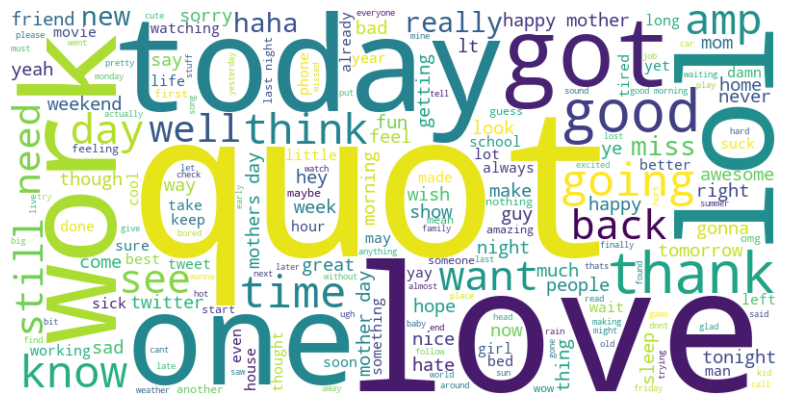

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine all text from the 'Cleaned_Text' column into one string
all_words = ' '.join(df['cleanText'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()


In [39]:
#df = df[['sentiment','stemToken']]
#df.columns= ['label','cleanText']

In [40]:
wordcloud

In [45]:
# Vectorizing the text using TF-IDF before modeling

tfidf_Vec = TfidfVectorizer(ngram_range=(1,4), max_features=5000)

X = tfidf_Vec.fit_transform(df['cleanText'])


In [46]:
X

<40000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 261129 stored elements in Compressed Sparse Row format>

In [47]:
xDF = pd.DataFrame(X.toarray(), columns =tfidf_Vec.get_feature_names_out() )

In [48]:
xDF

,ability,able,able get,about,absolutely,abt,academy,accept,accepted,access,...,zombie,zombies,zoo,½i,½m,½n,½s,½t,½y,½ï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
xDF.drop(columns =['½i', '½m', '½n',
       '½s', '½t', '½y', '½ï'],axis=1)

,ability,able,able get,about,absolutely,abt,academy,accept,accepted,access,...,yrs,yucky,yum,yummy,yup,zealand,zero,zombie,zombies,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 
https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing?scriptVersionId=19201884&cellId=34
###


#stemming

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

#df["text_stemmed"] = df["text"].apply(lambda text: stem_words(text))
#df.head()


    
    
#lemming 1
      
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

#df["text_lemmatized"] = df["text"].apply(lambda text: lemmatize_words(text))
#df.head()


    
    
#lemming 2 
    
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

#df["text_lemmatized"] = df["text"].apply(lambda text: lemmatize_words(text))
#df.head()
    
     


#removing emojis

import requests
import ast  # To safely parse Python literals

# URL of the raw file
url = "https://raw.githubusercontent.com/NeelShah18/emot/master/emot/emo_unicode.py"

# Fetch content
response = requests.get(url)

if response.status_code == 200:
    content = response.text

    # Extract dictionary (first occurrence of a dictionary in the script)
    start_index = content.find("{")
    end_index = content.rfind("}") + 1  # Find last closing brace
    emoji_dict_str = content[start_index:end_index]

    # Convert string to Python dictionary
    EMOJIS = ast.literal_eval(emoji_dict_str)

    # Print a sample
    for key, value in list(emoji_dict.items())[:5]:  # Show first 5 entries
        print(f"{key}: {value}")

else:
    print("Failed to fetch emoji  data.")
    EMOJIS = {}  # Empty dict if fetch fail



# Step 2: Function to remove emoji from text
def remove_emoji(text):
    if not EMOJIS:  # Ensure we have emoticons loaded
        print("No emojis available.")
        return text
    
    emoji_pattern = re.compile(r'(' + '|'.join(map(re.escape, EMOJI.keys())) + r')')
    return emoji_pattern.sub('', text)



# Step 3: Convert Emojis to Words
def convert_emojis(text):
    if not EMOJIS:  # Ensure we have emoji loaded
        print("No emojis available.")
        return text
    
    for emot, meaning in EMOJIS.items():
        # Replace commas with spaces and join words with underscores
        description = "_".join(meaning.replace(",", "").split())
        text = re.sub(re.escape(emot), description, text)

    return text
    
    

    
    
#removing emoticons 

#EMOTICONS & EMOJI url = https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py   
    
    
import requests
import ast  # To safely parse Python literals

# URL of the raw file
url = "https://raw.githubusercontent.com/NeelShah18/emot/master/emot/emo_unicode.py"

# Fetch content
response = requests.get(url)

if response.status_code == 200:
    content = response.text

    # Extract dictionary (first occurrence of a dictionary in the script)
    start_index = content.find("{")
    end_index = content.rfind("}") + 1  # Find last closing brace
    emoticon_dict_str = content[start_index:end_index]

    # Convert string to Python dictionary
    EMOTICONS = ast.literal_eval(emoticon_dict_str)

    # Print a sample
    for key, value in list(emoticon_dict.items())[:5]:  # Show first 5 entries
        print(f"{key}: {value}")

else:
    print("Failed to fetch emoticon data.")
    EMOTICONS = {}  # Empty dict if fetch fail

    
# Step 2: Function to remove emoticons from text
def remove_emoticons(text):
    if not EMOTICONS:  # Ensure we have emoticons loaded
        print("No emoticons available.")
        return text
    
    emoticon_pattern = re.compile(r'(' + '|'.join(map(re.escape, EMOTICONS.keys())) + r')')
    return emoticon_pattern.sub('', text)



# Step 3: Convert Emoticons to Words
def convert_emoticons(text):
    if not EMOTICONS:  # Ensure we have emoticons loaded
        print("No emoticons available.")
        return text
    
    for emot, meaning in EMOTICONS.items():
        # Replace commas with spaces and join words with underscores
        description = "_".join(meaning.replace(",", "").split())
        text = re.sub(re.escape(emot), description, text)

    return text


''' 

    
#removing emojis    
 
"""
Remove emoji from a text file and print it to stdout.
Usage
-----
    python remove-emoji.py input.txt > output.txt
"""
import re
import sys
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
 
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
remove_emoji("game is on 🔥🔥")    
    
OR

#for total use of all available emojis
def remove_emoji(text):
    
    emoji_pattern = re.compile(u'(' + u'|'.join(k for k in UNICODE_EMO) + u')')
    return emoji_pattern.sub(r'', text)

remove_emoji("Hello :-)")
    


#converting emojis to word 

emojis = https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py      #url for uncoded emojis
    
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
    return text

text = "game is on 🔥"
convert_emojis(text)



Function to remove emoticons from text

#this method copies the emoticons to a cell above , be4 running the code    
def remove_emoticons(text):
    
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

remove_emoticons("Hello :-)")
 
    
    
       
#converting emoticons to words 

#this method copies the emoticons to a cell above , be4 running the code   
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

text = "Hello :-) :-)"
convert_emoticons(text)

'''

#chart word conversion

chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

chat_words_conversion("one minute BRB")


#spelling correction

!pip install pyspellchecker


from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "speling correctin"
correct_spellings(text)